In [1]:
import matplotlib.pyplot as plt
import torch

In [2]:
import ehc_sn.simulations
import ehc_sn.models
import ehc_sn.figures

In [3]:
n_attractors = 5
mec_dims = [10, 12, 6]
hpc_dim = 8
ec_dim = 6

In [4]:
gx = [torch.randn(n_attractors, n) for n in mec_dims]
h = torch.randn(n_attractors, hpc_dim)

In [5]:
model = ehc_sn.models.CANModule(h, gx, ec_dim)
print(model)

CANModule(
  (mec): ModuleList(
    (0): GridCells(
      (neurons): ReLU(activation_function=ReLU)
      (synapses_hpc): Silent(in_features=8, out_features=10, bias=False)
      (synapses_rcc): Silent(in_features=10, out_features=10, bias=False)
    )
    (1): GridCells(
      (neurons): ReLU(activation_function=ReLU)
      (synapses_hpc): Silent(in_features=8, out_features=12, bias=False)
      (synapses_rcc): Silent(in_features=12, out_features=12, bias=False)
    )
    (2): GridCells(
      (neurons): ReLU(activation_function=ReLU)
      (synapses_hpc): Silent(in_features=8, out_features=6, bias=False)
      (synapses_rcc): Silent(in_features=6, out_features=6, bias=False)
    )
  )
  (hpc): PlaceCells(
    (neurons): ReLU(activation_function=ReLU)
    (synapses_mec): ModuleList(
      (0): Silent(in_features=10, out_features=8, bias=True)
      (1): Silent(in_features=12, out_features=8, bias=True)
      (2): Silent(in_features=6, out_features=8, bias=True)
    )
    (synapses_ec)

Visualizing initial state...


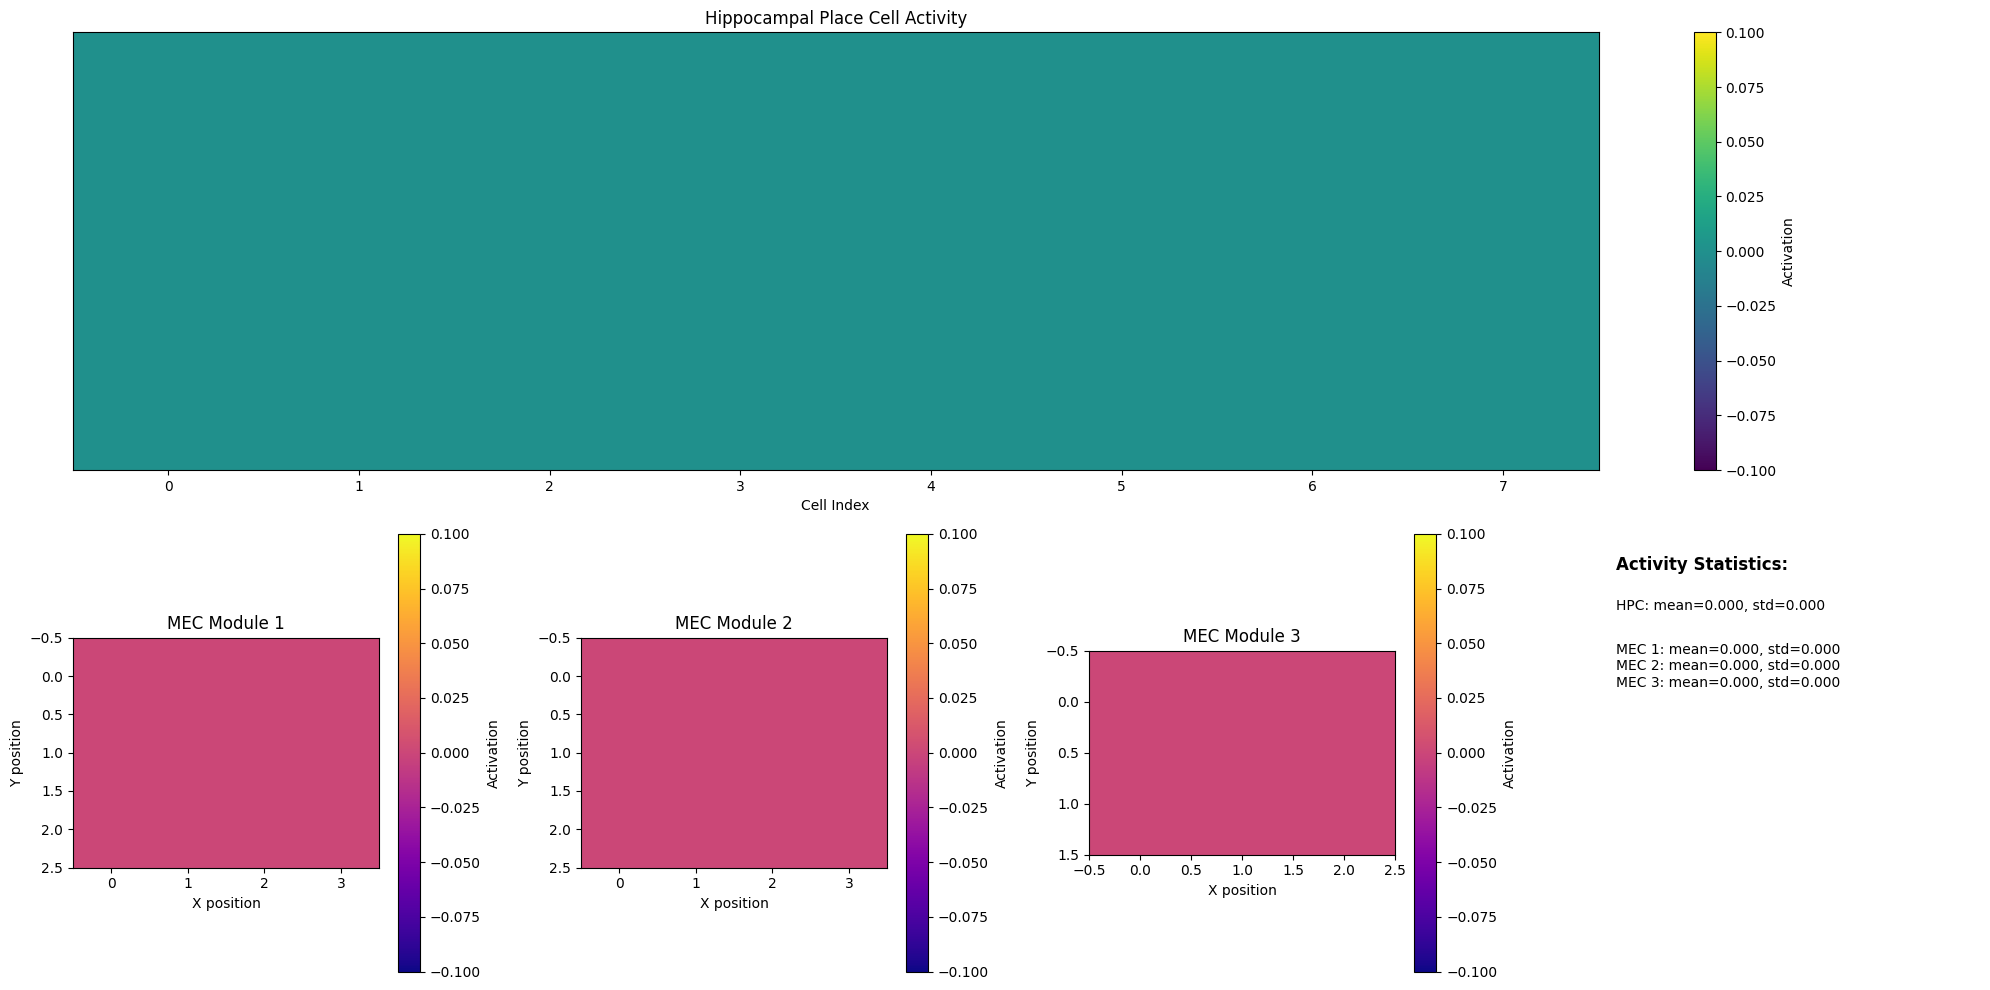

In [6]:
# Step 1: Visualize initial state
print("Visualizing initial state...")
ehc_sn.figures.visualize_neuron_actications(model)
plt.show()

Visualizing initial connectivity...


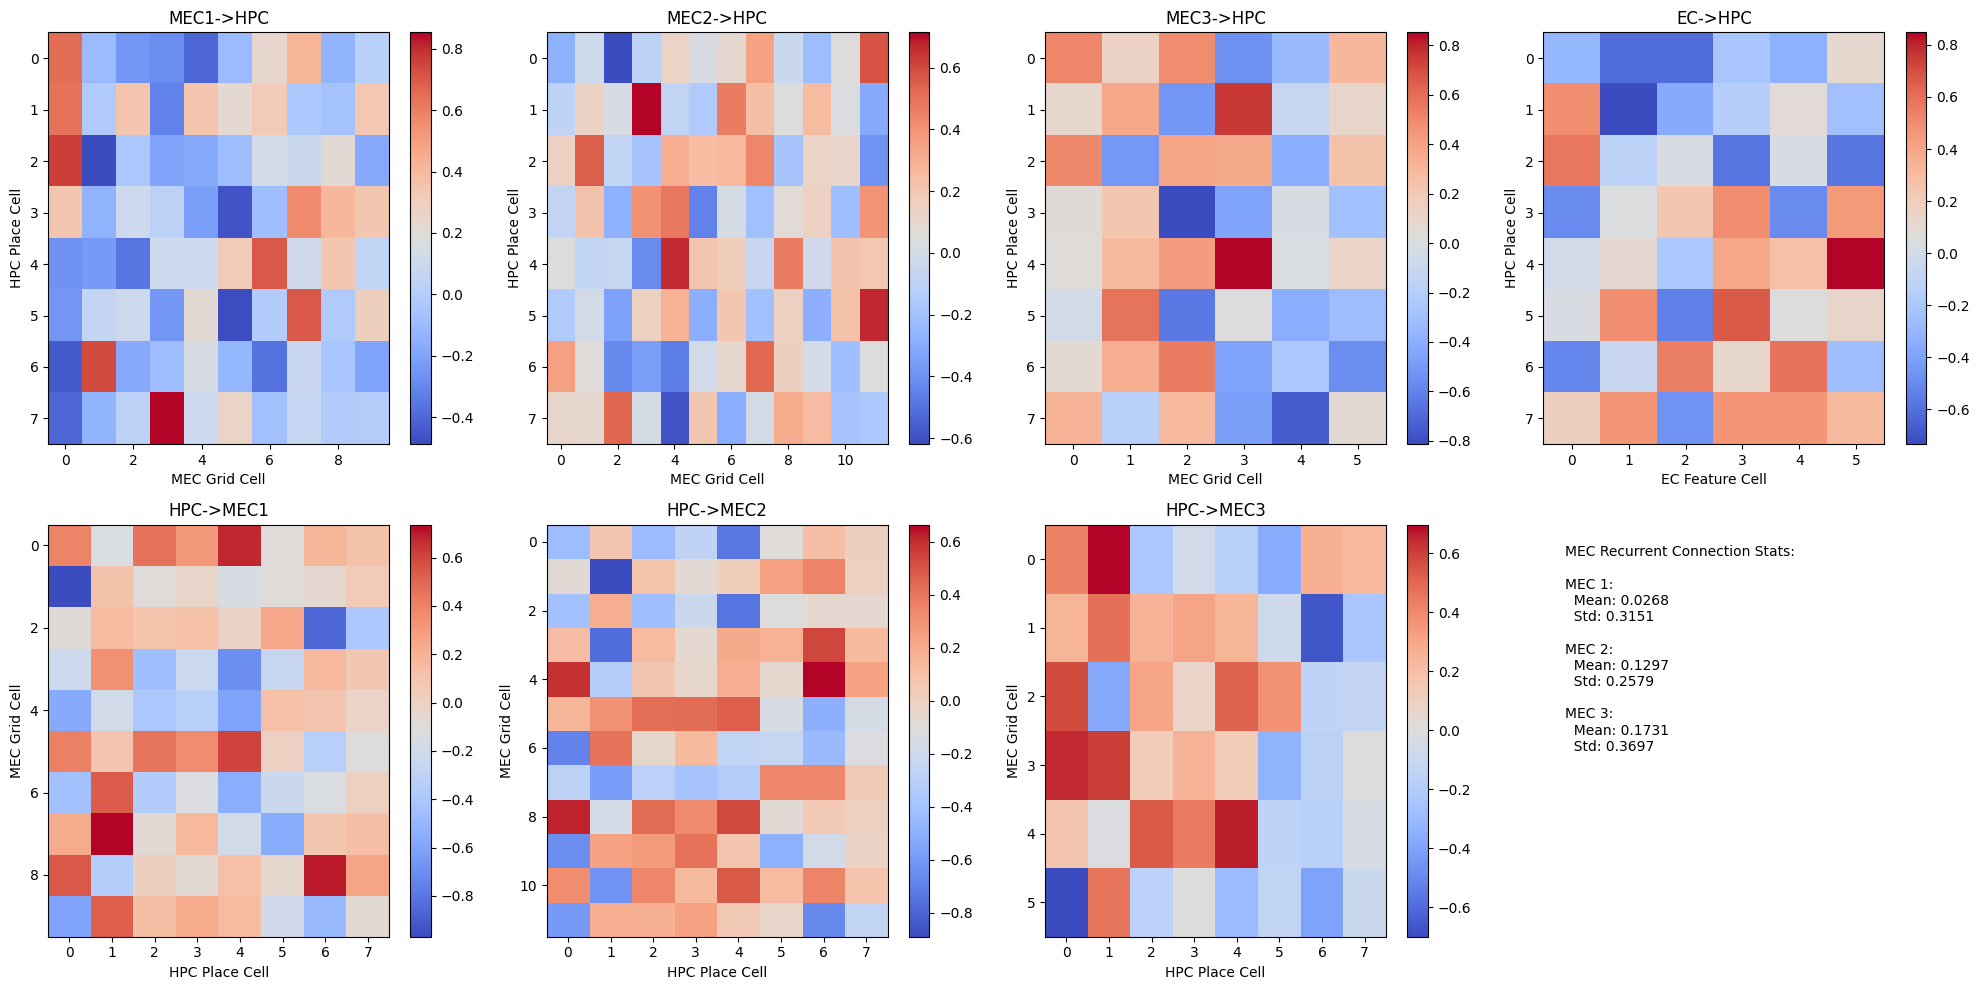

In [7]:
# Step 2: Visualize initial connectivity matrices
print("Visualizing initial connectivity...")
ehc_sn.figures.visualize_connectivity_matrices(model)
plt.show()

Visualizing memory retrieval...
External context activations: tensor([[-1.8268, -0.9824,  0.7833, -0.2027, -1.6296, -0.9253]])
Retrieved memory activations: tensor([[2., 2., 2., 2., 2., 0., 0., 0.]])


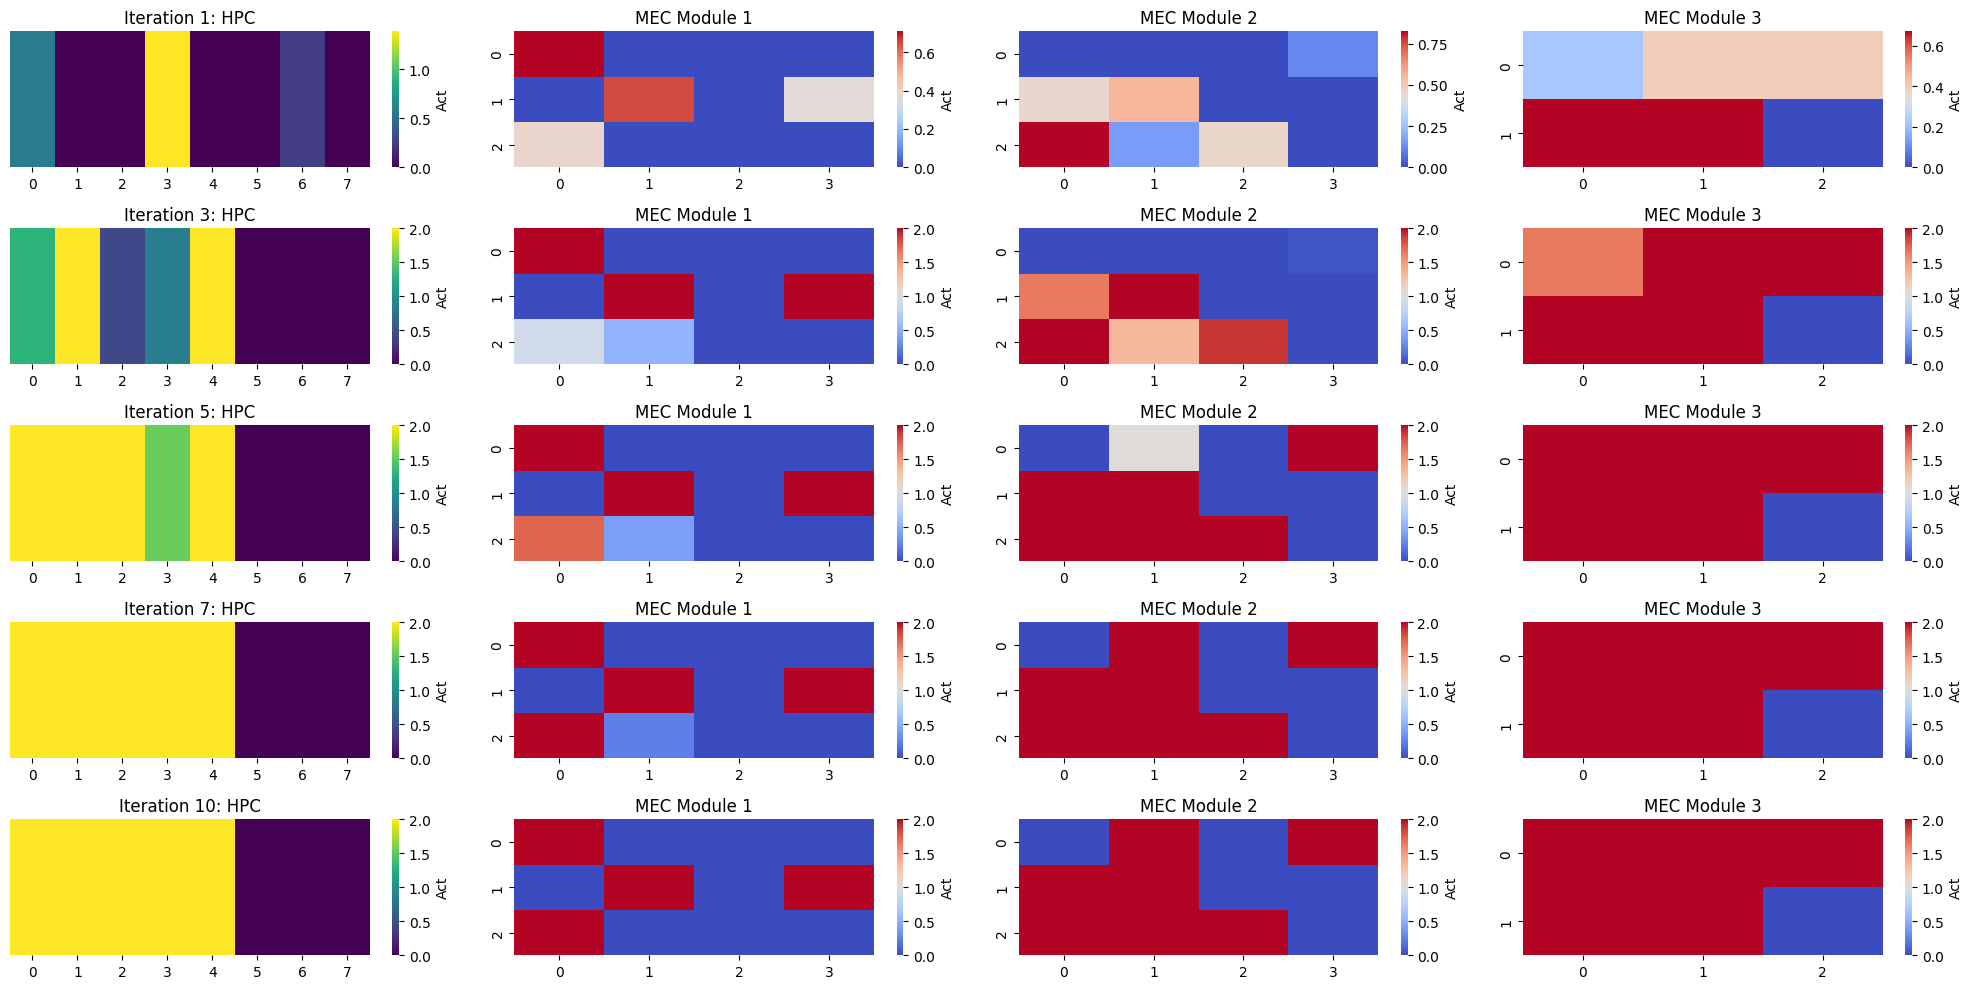

In [8]:
# Step 3: Visualize memory retrieval
print("Visualizing memory retrieval...")
ec_activations = torch.randn(1, ec_dim)
print("External context activations:", ec_activations)
simulation = ehc_sn.simulations.ItemMemoryRetrieval(model, ec_activations)(n_iterations=10)
print("Retrieved memory activations:", simulation.hpc_states[-1])
ehc_sn.figures.visualize_memory_retrieval(simulation)
plt.show()

In [ ]:
# Step 4: Run multiple simulations to observe attractor retrieval
for i in range(10):
    ec_activations = torch.randn(1, ec_dim)
    simulation = ehc_sn.simulations.ItemMemoryRetrieval(model, ec_activations)(n_iterations=100)
    hpc_state = simulation.hpc_states[-1]
    print(f"Iteration {i+1}:", "ec activations:", ec_activations, "Retrieved memory:", hpc_state)

Iteration 1: ec activations: tensor([[-0.4574,  0.0111, -2.7910,  1.0852, -1.7199, -0.9298]]) Retrieved memory: tensor([[2.0000, 2.0000, 2.0000, 1.5057, 2.0000, 1.1433, 0.0000, 0.0000]])
Iteration 2: ec activations: tensor([[-1.5246, -1.7009, -1.4967,  1.2470, -0.0559, -0.8885]]) Retrieved memory: tensor([[2.0000, 2.0000, 2.0000, 1.5493, 2.0000, 0.0000, 0.0000, 0.0000]])
Iteration 3: ec activations: tensor([[-0.2785, -1.5208, -0.0358, -2.0293,  0.5206,  0.1684]]) Retrieved memory: tensor([[2., 2., 2., 0., 2., 0., 0., 0.]])
Iteration 4: ec activations: tensor([[-0.9110, -1.3510,  0.3754, -0.9634, -2.0991, -0.2118]]) Retrieved memory: tensor([[2.0000, 2.0000, 2.0000, 1.9169, 2.0000, 0.0000, 0.0000, 0.0000]])
Iteration 5: ec activations: tensor([[-0.0229,  0.3270,  0.4636, -0.8885,  0.3418,  1.2085]]) Retrieved memory: tensor([[0.2016, 2.0000, 1.6079, 1.2629, 2.0000, 0.0000, 0.0000, 0.0000]])
Iteration 6: ec activations: tensor([[-0.3782,  0.3320,  1.1730,  1.1284, -0.8346,  1.0689]]) Ret

Visualizing neuron activations after memory retrieval...


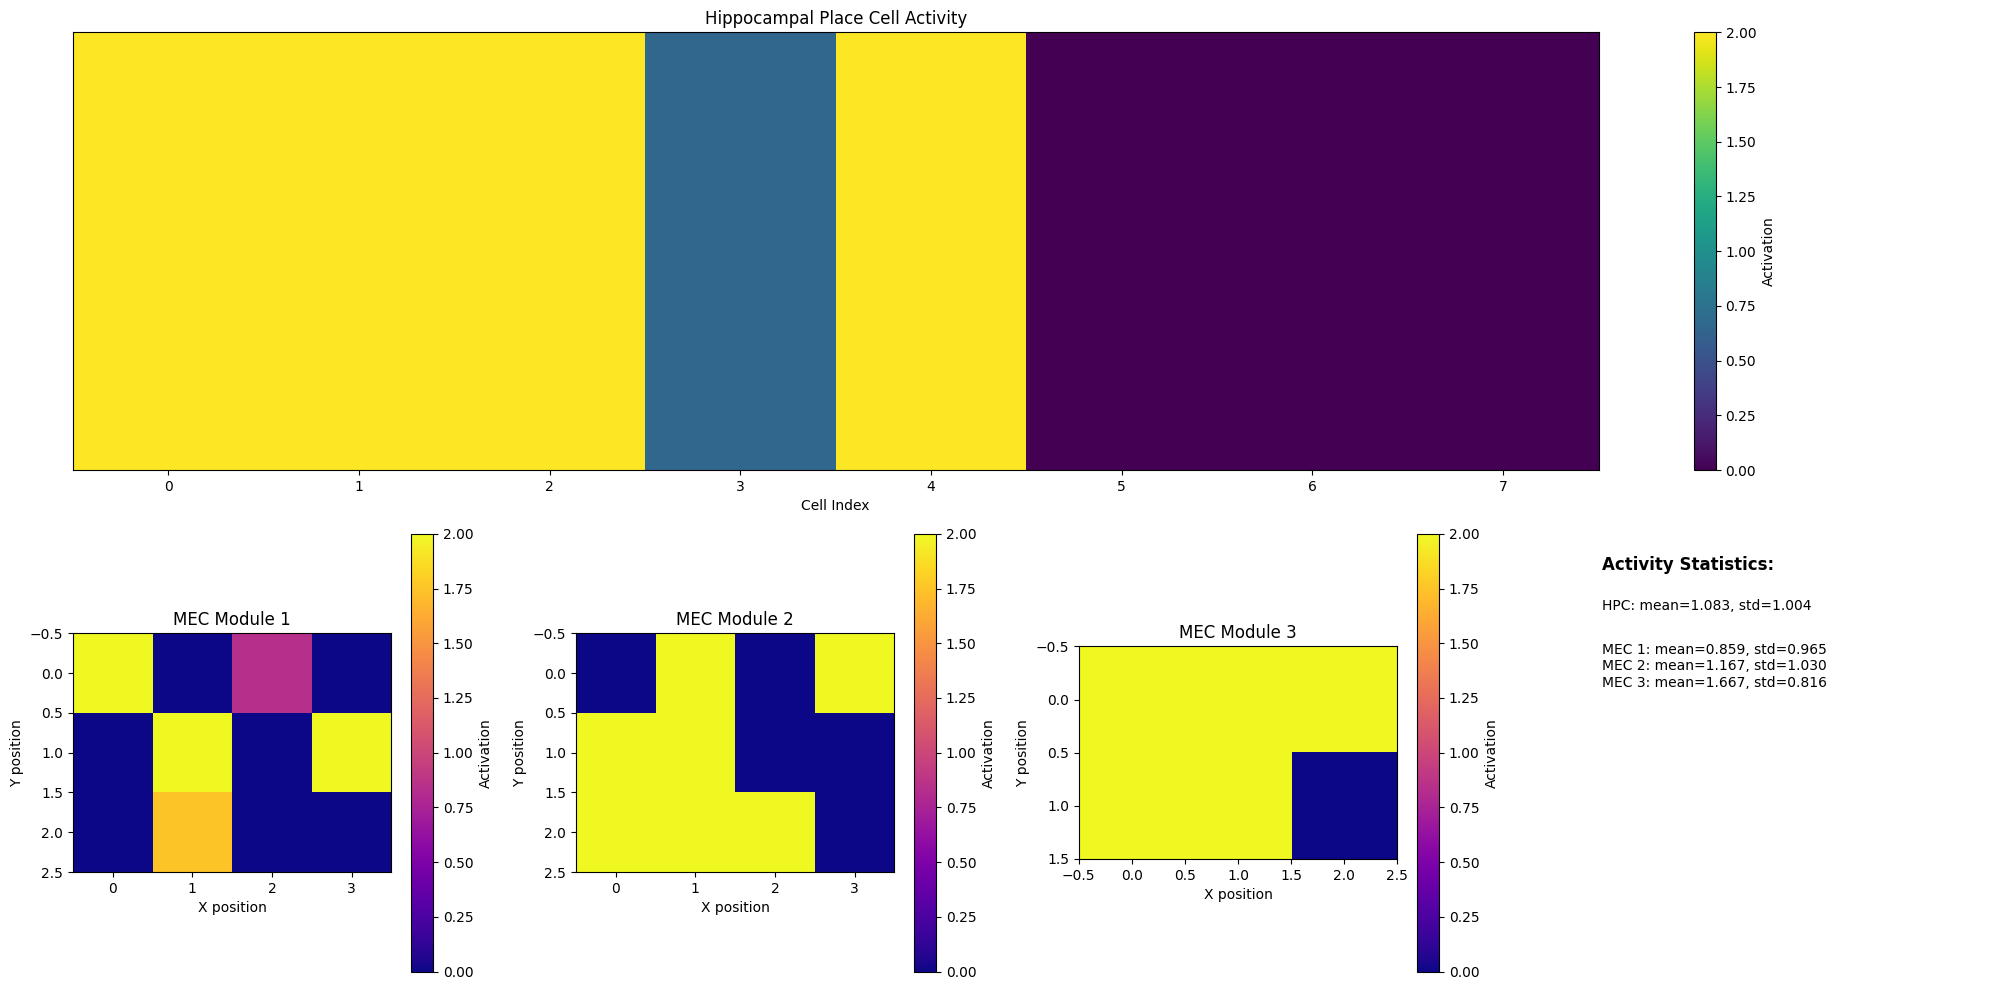

In [ ]:
# Step 5: Visualize neuron activations after memory retrieval
print("Visualizing neuron activations after memory retrieval...")
ehc_sn.figures.visualize_neuron_actications(model)
plt.show()